In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from skimage.color import rgb2gray
from skimage.transform import resize
from tqdm.notebook import tqdm
from tensorflow.keras import layers, models

2024-05-14 14:56:49.471650: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 14:56:50.626239: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import os

path = '../../00.Data/07.ML/ox/'
os.listdir(path)

['o.173.png',
 'o.130.png',
 'x.082.png',
 'x.029.png',
 'o.061.png',
 'o.066.png',
 'o.153.png',
 'x.033.png',
 'x.083.png',
 'x.089.png',
 'x.059.png',
 'o.013.png',
 'x.101.png',
 'o.158.png',
 'o.070.png',
 'x.055.png',
 'o.089.png',
 'o.119.png',
 'o.091.png',
 'x.027.png',
 'x.109.png',
 'o.051.png',
 'o.001.png',
 'x.057.png',
 'o.109.png',
 'x.039.png',
 'o.100.png',
 'o.175.png',
 'x.112.png',
 'o.009.png',
 'o.118.png',
 'o.164.png',
 'o.171.png',
 'x.068.png',
 'o.162.png',
 'x.114.png',
 'o.111.png',
 'x.010.png',
 'o.095.png',
 'x.072.png',
 'o.049.png',
 'o.167.png',
 'x.102.png',
 'o.038.png',
 'o.121.png',
 'o.031.png',
 'o.093.png',
 'o.020.png',
 'o.156.png',
 'x.007.png',
 'o.131.png',
 'o.074.png',
 'o.163.png',
 'o.002.png',
 'o.072.png',
 'x.001.png',
 'o.106.png',
 'x.115.png',
 'o.148.png',
 'o.116.png',
 'o.120.png',
 'o.065.png',
 'x.032.png',
 'o.045.png',
 'o.037.png',
 'o.063.png',
 'o.154.png',
 'x.022.png',
 'o.128.png',
 'x.003.png',
 'x.081.png',
 'x.03

라벨과 id 구분

In [3]:
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

이미지 크기 고정(128x128)

In [4]:
images = []
bar_total = tqdm(full_names)
for file in bar_total:
    image = mpimg.imread(path + file)
    images.append(resize(image, (128,128,3)))

  0%|          | 0/291 [00:00<?, ?it/s]

In [5]:
images = np.array(images)

In [6]:
images.shape

(291, 128, 128, 3)

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([0, 0, 1]), array(['o', 'x'], dtype='<U1'))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2,random_state=13, stratify=labels_encoded)

X_train.shape, X_test.shape

((232, 128, 128, 3), (59, 128, 128, 3))

In [9]:
tf.keras.backend.clear_session()

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Dropout(0.24),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation='softmax')
])

model.summary()

/home/han/venv/ML/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-14 14:57:24.730426: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-14 14:57:24.791311: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sy

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     7,373,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,430,658 (28.35 MB)

 Trainable params: 7,430,658 (28.35 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
import time

start_time = time.time()
hist = model.fit(X_train.reshape(232, 128, 128, 3),
                y_train, epochs=10, verbose=1, validation_data=(X_test.reshape(59, 128, 128, 3), y_test))
print('fit time : ', time.time() - start_time)

Epoch 1/10


I0000 00:00:1715666247.491781   45218 service.cc:145] XLA service 0x7204940014c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715666247.491815   45218 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-05-14 14:57:27.556106: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-14 14:57:27.890107: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5543 - loss: 5.1588

I0000 00:00:1715666259.159971   45218 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5375 - loss: 4.8737 - val_accuracy: 0.6102 - val_loss: 0.6900
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5869 - loss: 0.6868 - val_accuracy: 0.6102 - val_loss: 0.6742
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5781 - loss: 0.6777 - val_accuracy: 0.6102 - val_loss: 0.6676
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5970 - loss: 0.6561 - val_accuracy: 0.6610 - val_loss: 0.6396
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7764 - loss: 0.5453 - val_accuracy: 0.7119 - val_loss: 0.5198
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8214 - loss: 0.3768 - val_accuracy: 0.7288 - val_loss: 0.4540
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8335 - loss: 0.3230 - val_accuracy: 0.8305 - val_loss: 0.3615
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8661 - loss: 0.2420 - val_accuracy: 0.8475 - val_loss: 0.3252
Epoch 9/10
8

In [13]:
score = model.evaluate(X_test, y_test)
print(f'Test loss = {score[0]*100}\nTest Accuracy = {score[1]*100}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8558 - loss: 0.3503
Test loss = 37.2894287109375
Test Accuracy = 83.05084705352783


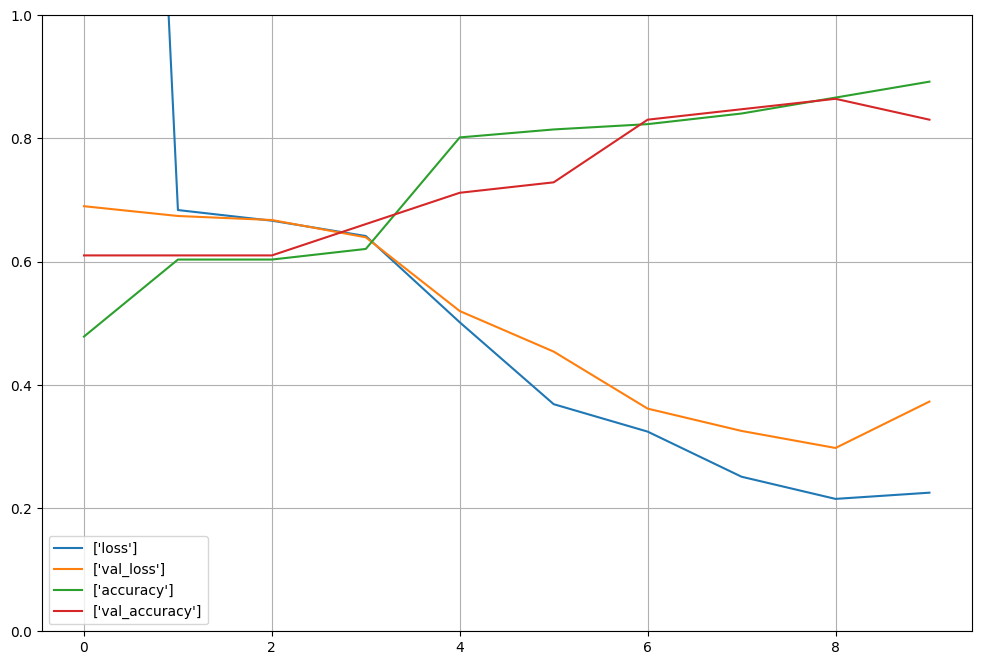

In [14]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))
plt.ylim(0,1)
for each in plot_target:
    plt.plot(hist.history[each], label=[each])
plt.legend()
plt.grid()
plt.show()

In [15]:
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [16]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

10

In [17]:
correct_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] == y_test[n]:
        correct_result.append(n)

len(correct_result)

49

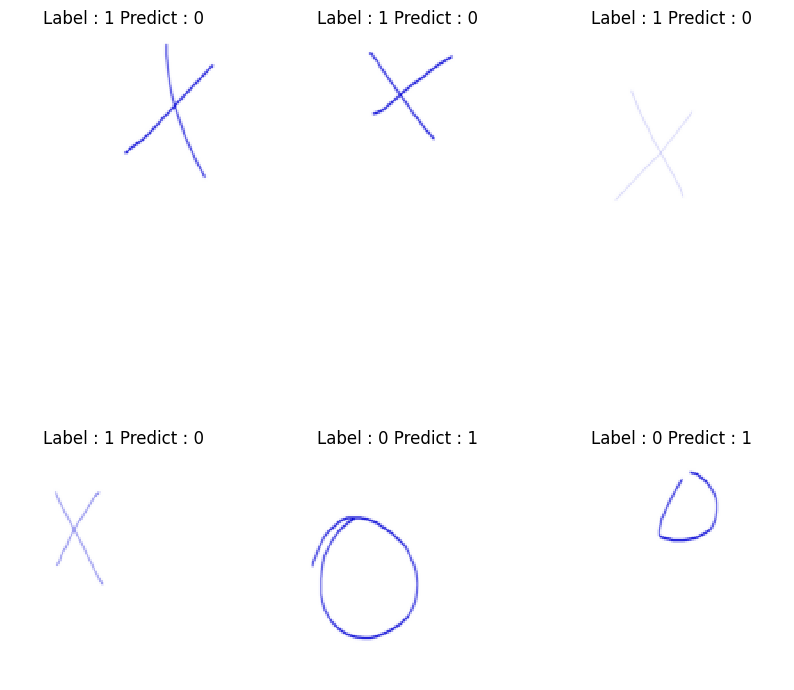

In [18]:
plt.figure(figsize=(10, 10))

for idx, n in enumerate(wrong_result[:6]):
    plt.subplot(2, 3, idx+1)
    plt.imshow(X_test[n], cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

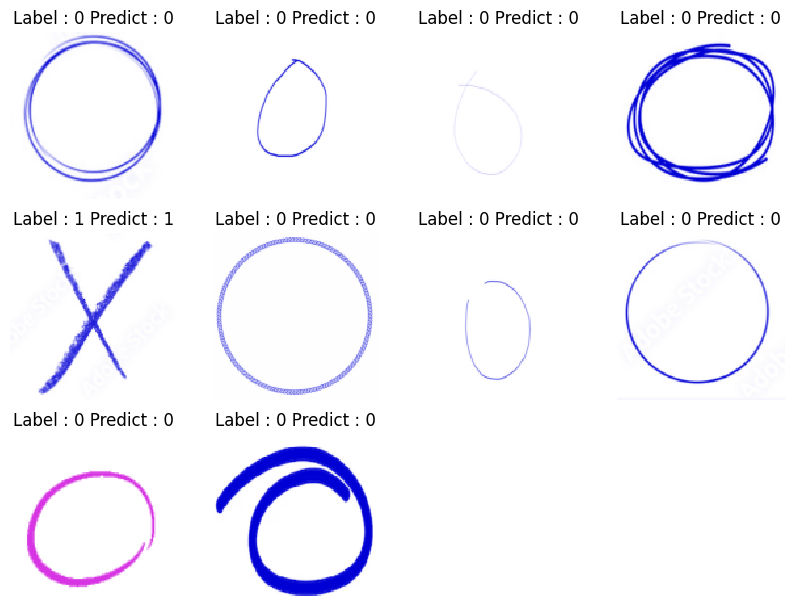

In [19]:
plt.figure(figsize=(10, 10))

for idx, n in enumerate(correct_result[:10]):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n], cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()